#### Here we are building a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("tvmarketing.csv")

In [4]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
df.isnull().sum(axis=0)

TV       0
Sales    0
dtype: int64

#### Visualizing Data using Seaborn

In [11]:
import seaborn as sns

%matplotlib inline

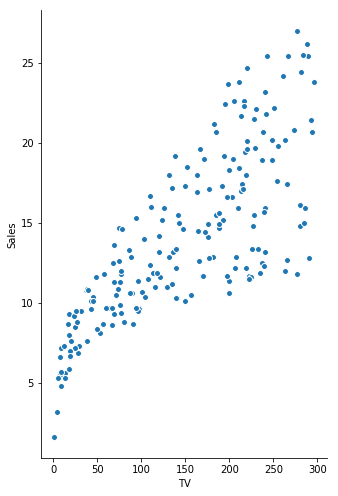

In [16]:
sns.pairplot(df, x_vars='TV',y_vars='Sales', size=7, aspect =0.7,kind = 'scatter')

### Simple Linear Equation

We use ```X``` for feature variable (independent variable) and ```y``` for target/response variable (dependent variable)

In [18]:
#assigning X to TVs 
X=df['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [19]:
#assigning y to Sales
y=df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Splitting dataset into Train and Test

***Using ```sklearn``` to split data into Train and test set***

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

#random_state is used to keep the same randomly generated values after we re-run the statement with the same given value of random_state

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [30]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

### Performing Linear Regression

In [31]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Calculating the coefficients

In [33]:
print(lr.intercept_)  #where the line is intercepting the y axis
print(lr.coef_)   #y=mx+c, m -> slope

6.989665857411679
[0.04649736]


In equation format, we get it as
###### y = 6.989  + 0.0464 * TV

#### Predictions

In [34]:
y_pred = lr.predict(X_test)

In [38]:
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

### Comparing the values

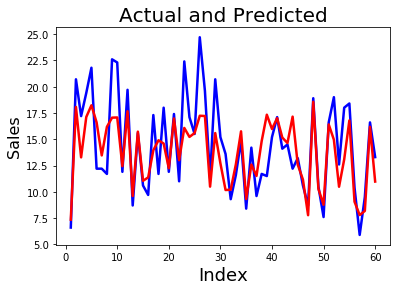

In [45]:
# Actual vs Predicted
import matplotlib.pyplot as plt

c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label
plt.show()

Amount of error between the actual and predicted value

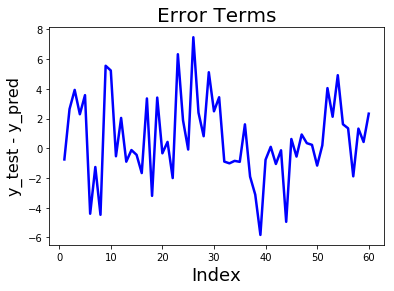

In [50]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test - y_pred', fontsize=16)                # Y-label
plt.show()

### Computing RMSE and R Square values

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [52]:
r_squared = r2_score(y_test, y_pred)

In [53]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Mean_Squared_Error shows that our model is not able to match 7.9% of the values